In [4]:
import xml.etree.ElementTree as ET
import pandas as pd
import json
import time
from Bio import Entrez
import csv
import plotly.graph_objects as go

In [5]:
#Cellosaurus
tree = ET.parse('cellosaurus_sample.xml')
#tree = ET.parse('../cellosaurus.xml')
root = tree.getroot()

## Cellosaurus
Recorro el arbol para linea celular de xml paso por cell - line, depués a accession-list, y luego obtengo el texto del recorrido del accession.

In [6]:
list_cell =[]
list_syn = []

diccionario = {
    'linea_celular' : '',
    'sinonimos' : [],
    'especie': '',   
}

name = ''
desp = ''

for i in root.find('cell-line-list'):
    for j in i.find('accession-list'):
        name = j.text
        diccionario['linea_celular'] = name  
        for m in i.find('species-list'):
            desp = m.text
        diccionario['especie'] = desp
        for k in i.find('name-list'):
            if k.get('type') =="identifier": 
                list_syn.append(k.text)
            if k.get('type') == "synonym":
                list_syn.append(k.text)
        diccionario['sinonimos'] = list_syn
        list_syn = []
        
        list_cell.append(diccionario)
        diccionario = { 'linea_celular' : '', 'sinonimos' : [], 'especie':[] }

In [7]:
cell_df = pd.DataFrame(list_cell)

In [8]:
cell_df
#df = pd.DataFrame(list_cell)
#df.to_csv('datos.csv')
#df.to_json('datos.json')

,linea_celular,sinonimos,especie
0,CVCL_B0T9,"[#132 PC3-1-SC-E8, Z48-5MG-70]",Mus musculus
1,CVCL_B0T8,"[#132 PL12 SC-D1, Z48-5MG-63]",Mus musculus
2,CVCL_E548,"[#15310-LN, 15310-LN, TER461, TER-461, Ter 461...",Homo sapiens
3,CVCL_KA96,[#16-15],Rattus norvegicus
4,CVCL_IW91,[#40a],Mus musculus
5,CVCL_B375,"[#490, 490, Mab 7, Mab7]",Mus musculus
6,CVCL_X345,"[#822, 822, Mab 13, Mab13]",Mus musculus
7,CVCL_E549,"[#W7079, #W7079 REM, REMUS, W7079]",Homo sapiens
8,CVCL_G217,[(BF1) 8A3.31],Mus musculus
9,CVCL_VG99,[(L)PC6],Homo sapiens


## Elimino lineas celulares que no son Homo sapiens

In [9]:
cell_df=cell_df[cell_df['especie']=='Homo sapiens']
cell_df

,linea_celular,sinonimos,especie
2,CVCL_E548,"[#15310-LN, 15310-LN, TER461, TER-461, Ter 461...",Homo sapiens
7,CVCL_E549,"[#W7079, #W7079 REM, REMUS, W7079]",Homo sapiens
9,CVCL_VG99,[(L)PC6],Homo sapiens
17,CVCL_B5B3,"[0.5alpha, 0.5 alpha]",Homo sapiens
18,CVCL_E557,"[00136, 136]",Homo sapiens
20,CVCL_VG31,[0162D],Homo sapiens
21,CVCL_VG32,[0165D],Homo sapiens
22,CVCL_ZW87,"[017-PC-A, PC-A]",Homo sapiens
23,CVCL_ZW88,"[017-PC-M, PC-M]",Homo sapiens
24,CVCL_ZW89,"[017-PC-O, PC-O]",Homo sapiens


In [10]:
data_list = []
data_query = []
for index, row in cell_df.iterrows():
    data_list.append([row['linea_celular'], row['sinonimos']])

for i in data_list: 
    query = i[0]
    num_syn = 0
    if len(i[1]) != 0: 
        for s in i[1]:
            query = query + " OR " + s
        num_syn = len(i[1])
        data_query.append({'cell_line': i[0], 'query': query, 'num_syn': num_syn})

## Lista de Diccionarios a Dataframe

In [11]:
df_queries = pd.DataFrame(data_query)
df_queries

,cell_line,query,num_syn
0,CVCL_E548,CVCL_E548 OR #15310-LN OR 15310-LN OR TER461 O...,9
1,CVCL_E549,CVCL_E549 OR #W7079 OR #W7079 REM OR REMUS OR ...,4
2,CVCL_VG99,CVCL_VG99 OR (L)PC6,1
3,CVCL_B5B3,CVCL_B5B3 OR 0.5alpha OR 0.5 alpha,2
4,CVCL_E557,CVCL_E557 OR 00136 OR 136,2
5,CVCL_VG31,CVCL_VG31 OR 0162D,1
6,CVCL_VG32,CVCL_VG32 OR 0165D,1
7,CVCL_ZW87,CVCL_ZW87 OR 017-PC-A OR PC-A,2
8,CVCL_ZW88,CVCL_ZW88 OR 017-PC-M OR PC-M,2
9,CVCL_ZW89,CVCL_ZW89 OR 017-PC-O OR PC-O,2


In [12]:
Entrez.email = 'henry.guanoluisa@epn.edu.ec'

#df_queries = pd.read_csv('queries.csv')
paper_id_list = []
error_paper_id_list = []
for index, row in df_queries.iterrows():
    try:
        string_search = Entrez.read(Entrez.esearch(db="pubmed", term=row['query'] + ' AND ("cell line" OR "cell-line" OR "cellular line")'))
        time.sleep(1)
        pubmed_ids = [int(id) for id in string_search['IdList']]
        paper_id_list.append({'cell_line': row['cell_line'], 'pubmed_ids': pubmed_ids, 'num_ids': len(pubmed_ids)})
        print("Linea Celular " + row['cell_line'])
    except Exception as e:
        print(f"Error Linea Celular {row['cell_line']}: {str(e)}")
        error_paper_id_list.append({'cell_line': row['cell_line'], 'pubmed_ids': [], 'num_ids': 0})

df_results = pd.DataFrame(paper_id_list)
df_results.to_csv('results.csv', index=False)

df_errors = pd.DataFrame(error_paper_id_list)
df_errors.to_csv('errores.csv', index=False)

Linea Celular CVCL_E548
Linea Celular CVCL_E549
Linea Celular CVCL_VG99
Linea Celular CVCL_B5B3
Linea Celular CVCL_E557
Linea Celular CVCL_VG31
Linea Celular CVCL_VG32
Linea Celular CVCL_ZW87
Linea Celular CVCL_ZW88
Linea Celular CVCL_ZW89
Linea Celular CVCL_XB90
Linea Celular CVCL_A2TJ
Linea Celular CVCL_A2UI
Linea Celular CVCL_A2UJ
Linea Celular CVCL_A2UK
Linea Celular CVCL_A2UL
Linea Celular CVCL_A2TK
Linea Celular CVCL_A2UM
Linea Celular CVCL_A2UN
Linea Celular CVCL_A2UP
Linea Celular CVCL_A2UQ
Linea Celular CVCL_A2TL
Linea Celular CVCL_A2UR
Linea Celular CVCL_A2US
Linea Celular CVCL_A2UT
Linea Celular CVCL_A2TM
Linea Celular CVCL_A2UU
Linea Celular CVCL_A2UV
Linea Celular CVCL_A2UW
Linea Celular CVCL_A2UX
Linea Celular CVCL_IP58
Linea Celular CVCL_IJ15


In [13]:
#data_query_example = data_query[:3]
data_query_example = data_query
#print(data_query_example)

In [14]:
import ast
#df = pd.read_csv('results500.csv')
df = pd.read_csv('results.csv')
paper_id_list_ = []

for _, row in df.iterrows():
    cell_line = {'cell_line': row['cell_line'], 'pubmed_ids': ast.literal_eval(row['pubmed_ids']), 'num_ids': row['num_ids']}
    paper_id_list_.append(cell_line)
    
df_results = pd.DataFrame(paper_id_list_)

In [15]:
df_results = df_results.loc[(df_results['num_ids'] > 1) & (df_results['num_ids'] < 500)]

In [16]:
df_results['count_pubmed_ids'] = df_results['pubmed_ids'].apply(len)
df_results

,cell_line,pubmed_ids,num_ids,count_pubmed_ids
1,CVCL_E549,"[36835539, 36769052, 36559131, 34439845, 33336...",20,20
2,CVCL_VG99,"[25772757, 15735043, 7617765, 8178493, 6481764]",5,5
3,CVCL_B5B3,"[36997025, 36917693, 36573995, 36565478, 36309...",20,20
5,CVCL_VG31,"[36710992, 36200530, 35036572, 33969526, 33453...",13,13
7,CVCL_ZW87,"[36710992, 36406681, 36200530, 35953822, 35429...",20,20
8,CVCL_ZW88,"[36710992, 36200530, 35385726, 35036572, 33969...",17,17
9,CVCL_ZW89,"[36710992, 36200530, 35036572, 33969526, 33453...",17,17
11,CVCL_A2TJ,"[36710992, 36200530, 35036572, 33969526, 33453...",17,17
16,CVCL_A2TK,"[36710992, 36200530, 35563320, 35036572, 34943...",18,18
17,CVCL_A2UM,"[36710992, 36200530, 35036572, 33969526, 33453...",13,13


In [17]:
df_results['pubmed_ids_13'] = df_results['pubmed_ids'].apply(lambda x : x[:13])

In [18]:
num_ids = df_results['num_ids']
mapa_num_ids = {}

for num_id in num_ids:
    if num_id in mapa_num_ids:
        mapa_num_ids[num_id] += 1
    else:
        mapa_num_ids[num_id] = 1

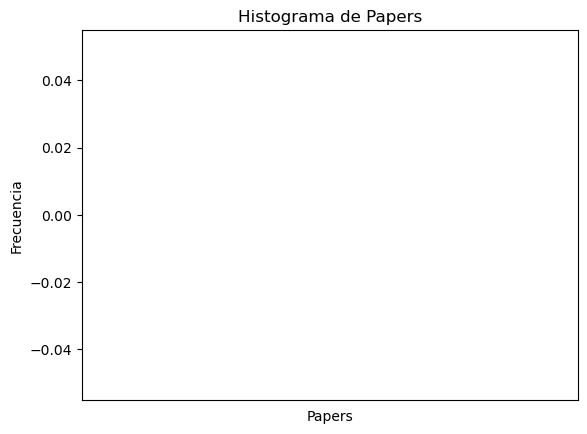

In [19]:
import matplotlib.pyplot as plot
intervalos = range(min(num_ids), max(num_ids) + 2, 30)

plot.hist(x=num_ids, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plot.title('Histograma de Papers')
plot.xlabel('Papers')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)

plot.show()

## Nota
Comprobar que no todas lineas celulares tienen paper en pudmed

In [20]:
import json
import pandas as pd
from Bio import Entrez

Entrez.email = 'henry.guanoluisa@epn.edu.ec'

string_search = Entrez.read( Entrez.esearch( db="pubmed", term='("CVCL_E548") AND ("cell line" OR "cell-line" OR "cellular line")' ))
print(string_search)

{'Count': '0', 'RetMax': '0', 'RetStart': '0', 'IdList': [], 'TranslationSet': [], 'QueryTranslation': '"cvcl"[All Fields] AND "e548"[All Fields] AND ("cell-line"[All Fields] OR "cell-line"[All Fields] OR "cellular line"[All Fields])', 'WarningList': {'OutputMessage': ['No items found.'], 'PhraseIgnored': [], 'QuotedPhraseNotFound': ['"CVCL_E548"']}}


## Papers
En el siguiente bloque se obtiene los papers de pudmed

In [24]:
import json
import pandas as pd
from Bio import Entrez
import os

Entrez.email = 'henry.guanoluisa@epn.edu.ec'
result = []
result_wo_abstract = []
result_errors = []
directory = 'data'

for _, row in df_results.iterrows():
    try:
        if len(row['pubmed_ids']) != 0:
            pubmed_ids_search = Entrez.efetch(db="pubmed", id=','.join(map(str, row['pubmed_ids_13'])), rettype="xml", retmode="text")
            result_pubmed_ids_search = Entrez.read(pubmed_ids_search)
            result = []
            for pubmed_article in result_pubmed_ids_search['PubmedArticle']:
                pubmed_id = int(str(pubmed_article['MedlineCitation']['PMID']))
                title = pubmed_article['MedlineCitation']['Article']['ArticleTitle']
                article = pubmed_article['MedlineCitation']['Article']
                if 'Abstract' in article:
                    abstract = article['Abstract']['AbstractText'][0]
                    data = { "cell_line":row['cell_line'], "pubmedid": pubmed_id, "title": title, "abstract": abstract }
                    result.append(data)
                else:
                    print("La linea celular " + row['cell_line'] + " sin Abstract")
                    data = { "cell_line": row['cell_line'], "pubmedid": pubmed_id, "title": title, "abstract": None }
                    result_wo_abstract.append(data)
           
            df = pd.DataFrame(result)
            cell_line = row['cell_line']
            if not os.path.exists(directory):
                os.makedirs(directory)
            file_path = os.path.join(directory, '{}_data.json.gz'.format(cell_line))
            with gzip.open(file_path, 'wb') as f:
                f.write(df.to_json(orient='table').encode('utf-8'))
            print("La linea celular " + row['cell_line'] + " se ha guardado")
            
            df_errors = pd.DataFrame(result_wo_abstract)
            df_errors.to_csv('errores_abs.csv', index=False)
        
    except Exception as e:
        print(f"Error Linea Celular {row['cell_line']}: {str(e)}")
        result_errors.append({'cell_line': row['cell_line']})            
            
df_result_errors = pd.DataFrame(result_errors)
df_result_errors.to_csv('abstract_errors.csv', index=False)

La linea celular CVCL_E549 se ha guardado
La linea celular CVCL_VG99 se ha guardado
La linea celular CVCL_B5B3 se ha guardado
La linea celular CVCL_VG31 se ha guardado
La linea celular CVCL_ZW87 se ha guardado
La linea celular CVCL_ZW88 se ha guardado
La linea celular CVCL_ZW89 se ha guardado
La linea celular CVCL_A2TJ se ha guardado
La linea celular CVCL_A2TK se ha guardado
La linea celular CVCL_A2UM se ha guardado
La linea celular CVCL_IP58 se ha guardado
La linea celular CVCL_IJ15 sin Abstract
La linea celular CVCL_IJ15 se ha guardado


In [26]:
with gzip.open('data/CVCL_A2TJ_data.json.gz', 'rb') as f:
    json_bytes = f.read()

json_str = json_bytes.decode('utf-8')
df = pd.read_json(json_str, orient='table')
df

,cell_line,pubmedid,title,abstract
0,CVCL_A2TJ,36710992,Investigation of Curcumin-Loaded OA400 Nanopar...,"Curcumin, a compound derived from the root of ..."
1,CVCL_A2TJ,36200530,Development of a novel bioengineered 3D brain-...,Primary blast injury is caused by the direct i...
2,CVCL_A2TJ,35036572,Preparation of fatty acid solutions exerts sig...,Free fatty acids are essentially involved in t...
3,CVCL_A2TJ,33969526,In vivo CRISPR screening for novel noncoding R...,CRISPR (clustered regularly interspaced short ...
4,CVCL_A2TJ,33453083,Select neurotrophins promote oligodendrocyte p...,Axonal damage and the subsequent interruption ...
5,CVCL_A2TJ,33165868,Establishment of a bladder cancer cell line ex...,Several experimental models including patient ...
6,CVCL_A2TJ,32954502,Noradrenaline protects neurons against H<sub>2...,Oxidative stress has been implicated in a vari...
7,CVCL_A2TJ,32197467,Elevated PDK1 Expression Drives PI3K/AKT/MTOR ...,"Resistance to radiotherapy (IR), with conseque..."
8,CVCL_A2TJ,32133675,Tomosyn regulates the small RhoA GTPase to con...,"Tomosyn, a protein encoded by syntaxin-1-bindi..."
9,CVCL_A2TJ,31157458,Protective roles of carbonic anhydrase 8 in Ma...,Machado-Joseph disease (MJD)/Spinocerebellar a...
